## 분석에 필요한 다양한 라이브러리를 import합니다.

In [1]:
# 라이브러리 불러오기
import pandas as pd
# 1. pandas: 데이터를 빠르고 강력하게, 그리고 유연하고 쉽게 다룰 수 있게 해주는 데이터 분석, 증강 도구입니다.
#    - <https://pandas.pydata.org/docs/user_guide/index.html>
import numpy as np
# 2. numpy: 파이썬에서 수치 계산을 빠르게 수행할 수 있게 해주는 도구입니다.
#    - <https://numpy.org/doc/stable/>
import matplotlib.pyplot as plt
# 3. matplolib: 정적, 애니메이션, 또는 상호작용형 시각화를 생성하기 위한 포괄적인 도구입니다.
#    - <https://matplotlib.org/stable/users/index>

## 모델 학습에 사용할 데이터셋을 불러옵니다.

In [2]:
pd.set_option('display.max_columns', None)
Data_PATH_train = '../0.Data/tox21_train.csv'
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.
df_train = pd.read_csv(Data_PATH_train)
# pandas 라이브러리의 read_csv 메소드를 활용하여 csv 파일을 load합니다.
df_train

,maccs_1,maccs_2,maccs_3,maccs_4,maccs_5,maccs_6,maccs_7,maccs_8,maccs_9,maccs_10,maccs_11,maccs_12,maccs_13,maccs_14,maccs_15,maccs_16,maccs_17,maccs_18,maccs_19,maccs_20,maccs_21,maccs_22,maccs_23,maccs_24,maccs_25,maccs_26,maccs_27,maccs_28,maccs_29,maccs_30,maccs_31,maccs_32,maccs_33,maccs_34,maccs_35,maccs_36,maccs_37,maccs_38,maccs_39,maccs_40,maccs_41,maccs_42,maccs_43,maccs_44,maccs_45,maccs_46,maccs_47,maccs_48,maccs_49,maccs_50,maccs_51,maccs_52,maccs_53,maccs_54,maccs_55,maccs_56,maccs_57,maccs_58,maccs_59,maccs_60,maccs_61,maccs_62,maccs_63,maccs_64,maccs_65,maccs_66,maccs_67,maccs_68,maccs_69,maccs_70,maccs_71,maccs_72,maccs_73,maccs_74,maccs_75,maccs_76,maccs_77,maccs_78,maccs_79,maccs_80,maccs_81,maccs_82,maccs_83,maccs_84,maccs_85,maccs_86,maccs_87,maccs_88,maccs_89,maccs_90,maccs_91,maccs_92,maccs_93,maccs_94,maccs_95,maccs_96,maccs_97,maccs_98,maccs_99,maccs_100,maccs_101,maccs_102,maccs_103,maccs_104,maccs_105,maccs_106,maccs_107,maccs_108,maccs_109,maccs_110,maccs_111,maccs_112,maccs_113,maccs_114,maccs_115,maccs_116,maccs_117,maccs_118,maccs_119,maccs_120,maccs_121,maccs_122,maccs_123,maccs_124,maccs_125,maccs_126,maccs_127,maccs_128,maccs_129,maccs_130,maccs_131,maccs_132,maccs_133,maccs_134,maccs_135,maccs_136,maccs_137,maccs_138,maccs_139,maccs_140,maccs_141,maccs_142,maccs_143,maccs_144,maccs_145,maccs_146,maccs_147,maccs_148,maccs_149,maccs_150,maccs_151,maccs_152,maccs_153,maccs_154,maccs_155,maccs_156,maccs_157,maccs_158,maccs_159,maccs_160,maccs_161,maccs_162,maccs_163,maccs_164,maccs_165,maccs_166,NR-AR
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:,-1]

# Train 과정에 사용할 데이터와 Test 과정에 사용할 데이터를 load한 이후, 
# 해당 데이터 중에서 독립변수와 반응변수를 별도로 저장해줍니다.

# df_train은 X_train(독립변수), y_train(반응변수)로 분할합니다.
# maccs_1열[column = 0]부터 maccs_166열[column = 165]까지는 독립변수이고, 마지막 열(NR-AR)은 반응변수(정답값)입니다.

print(X_train.shape, y_train.shape)

(11130, 166) (11130,)


## 모델을 생성합니다.

In [4]:
from sklearn.cross_decomposition import PLSRegression as plsda

model = plsda(n_components=1, max_iter=500, tol=0.000001)
model.fit(X_train, y_train)

# - Partial Least Squares Discriminant Analysis (PLSDA)는 지도 학습의 차원 축소와 분류 기법으로, 고차원 데이터에서 변수 간의 관계를 모델링하여 주요한 정보를 추출하고,
# - 이를 바탕으로 데이터가 속하는 클래스를 예측합니다. 예측 변수와 반응 변수 사이의 다변량 관계를 탐색할 때 유용하므로, 변수의 개수가 샘플의 수보다 많은 경우에 더욱 유용하게 사용할 수 있습니다.

PLSRegression(n_components=1)

## Partial Least Squares Discriminant Analysis (PLS-DA)의 주요 하이퍼파라미터

- `n_components`: 모델이 추출할 성분의 수입니다. 이 값은 데이터 세트의 차원을 줄이는 데 사용되며, 모델의 복잡도와 직접적인 관련이 있습니다.
- `scale`: boolean(T/F) 값으로, True일 경우, 각 특성이 평균이 0이고 분산이 1이 되도록 데이터를 스케일링합니다.
- `max_iter`: 알고리즘의 최대 반복 횟수입니다. PLS-DA는 반복적인 최적화 과정을 거치며, 이 매개변수는 해당 과정의 반복 횟수를 제한합니다.
- `tol`: 알고리즘의 수렴 기준으로 사용되는 허용 오차입니다. 이 값은 알고리즘이 수렴했다고 판단되는 수치적 안정성과 정밀도를 결정합니다.

### 사용 시 고려 사항

- PLS-DA는 고차원 데이터에서 유용하게 사용될 수 있으나, `n_components`를 적절히 설정하는 것이 중요합니다. 너무 많은 성분을 사용하면 과적합의 위험이 있으며, 너무 적으면 모델이 데이터의 중요한 정보를 놓칠 수 있습니다.
- 데이터 전처리 과정에서 `scale` 옵션의 사용 여부를 고려해야 합니다. 데이터의 스케일링은 모델의 성능에 큰 영향을 미칠 수 있습니다.
- `max_iter`와 `tol`은 알고리즘의 수렴 속도와 관련이 있으므로, 수렴 문제가 발생하는 경우 이 매개변수들을 조정할 수 있습니다.

### 참고 자료

- 공식 문서 링크: (공식 문서 링크를 여기에 포함시키세요. 예를 들어, PLS-DA가 구현된 scikit-learn, 혹은 다른 라이브러리의 문서 페이지)
- (https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html)


## Partial Least Squares Discriminant Analysis (PLS-DA)의 목적 함수

Partial Least Squares Discriminant Analysis (PLS-DA)는 주로 고차원 데이터 세트에서 차원 축소와 분류를 위해 사용되는 기법입니다. PLS-DA는 Partial Least Squares Regression (PLSR)을 분류 문제에 적용한 것으로, 주어진 예측 변수(특성)와 반응 변수(클래스 레이블) 사이의 관계를 모델링합니다. PLSR과 마찬가지로, PLS-DA의 목적은 예측 변수와 반응 변수 사이의 공분산을 최대화하는 성분을 찾는 것입니다.

PLS-DA에서는 반응 변수를 클래스 멤버십에 대한 이진 데이터로 변환하여 사용합니다. 이를 통해, PLS 모델은 주어진 특성을 기반으로 각 클래스에 속할 확률을 예측할 수 있습니다.

PLS-DA의 목적 함수는 PLSR의 목적 함수와 유사하며, 주로 고차원 데이터에서 중요한 정보를 포착하는 몇 개의 성분을 추출하는 데 초점을 맞춥니다. PLS-DA의 목적함수는 아래와 같습니다.
$$
\max_{\mathbf{w}, \mathbf{c}} \ \mathbf{w}^T \mathbf{X}^T \mathbf{Y} \mathbf{c}
$$

여기서:
- $\mathbf{X}$는 예측 변수(특성)의 데이터 행렬입니다.
- $\mathbf{Y}$는 반응 변수(클래스 레이블)의 데이터 행렬입니다.
- $\mathbf{w}$는 $\mathbf{X}$의 가중치 벡터입니다.
- $\mathbf{c}$는 $\mathbf{Y}$의 가중치 벡터입니다.

목표는 $\mathbf{X}$와 $\mathbf{Y}$ 사이의 공분산을 최대화하는 $\mathbf{w}$와 $\mathbf{c}$를 찾는 것입니다. 이를 통해, PLS-DA는 데이터의 차원을 줄이면서도 클래스 구분에 중요한 정보를 유지할 수 있습니다.

PLS-DA 및 PLSR에 대한 더 자세한 정보는 scikit-learn의 공식 문서에서 찾을 수 있습니다:

- PLSR 관련 문서: [https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html)


## PLS-DA Model의 Feature Importance 시각화

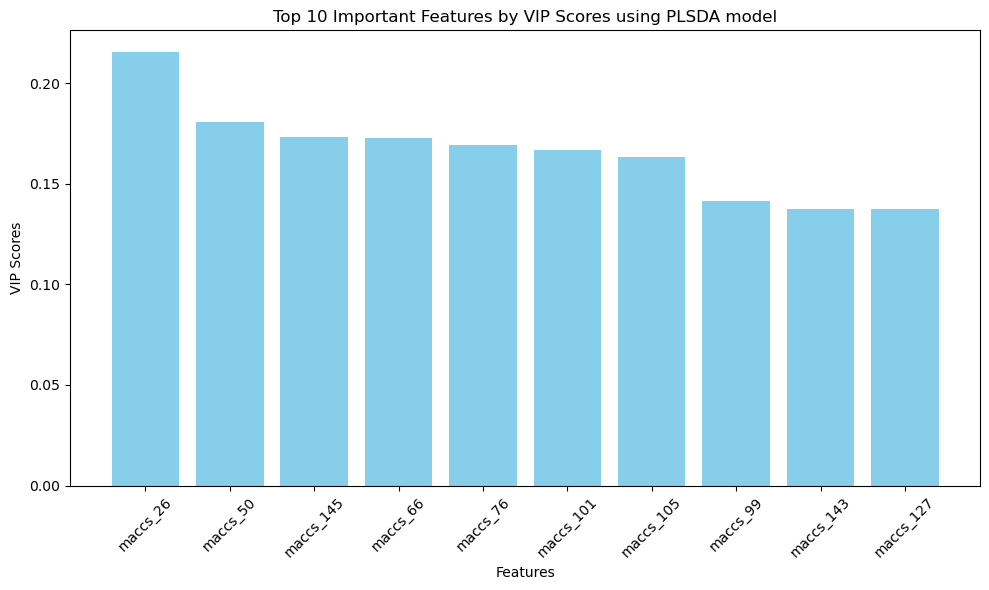

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

# plsda 모델의 feature importance 평가를 위한 vip_score 함수 제작
def vip_score(pls_model):
    t = pls_model.x_scores_  # scores
    w = pls_model.x_weights_  # weights
    q = pls_model.y_loadings_  # Y loadings
    p = np.diag(t.T @ t @ q.T @ q) / pls_model.y_scores_.shape[0]  # scaling factor
    w_squared = np.square(w)
    vip = np.sqrt(np.sum(w_squared * p, axis=1) / np.sum(p))
    return vip

# PLS-DA 모델 학습
model_vip = plsda(n_components=1, max_iter=500, tol=0.000001)
model_vip.fit(X_train, y_train)

# VIP 점수 계산
vip_scores = vip_score(model_vip)

# VIP 점수를 기반으로 상위 10개 변수 선정
top_10_features_idx = np.argsort(vip_scores)[-10:][::-1]
top_10_vip_scores = vip_scores[top_10_features_idx]
top_10_feature_names = [f'maccs_{i+1}' for i in top_10_features_idx]

# 상위 10개 변수 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_10_feature_names, top_10_vip_scores, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('VIP Scores')
plt.title('Top 10 Important Features by VIP Scores using PLSDA model')
plt.tight_layout()
plt.show()

# - PLSDA 모델을 사용하여 특성 중요도를 평가하고, Feature Importance가 가장 높은 상위 10개 Feature을 식별하여 시각화하는 코드입니다.
# - PLSDA는 Feature Importance 계산 함수를 제공하지 않기에, VIP(Variable Importance in the Projection) 함수를 새롭게 정의하여 점수를 계산하고, 이를 바탕으로 중요도가 높은 feature를 나타내었습니다.

## 결정 경계 시각화

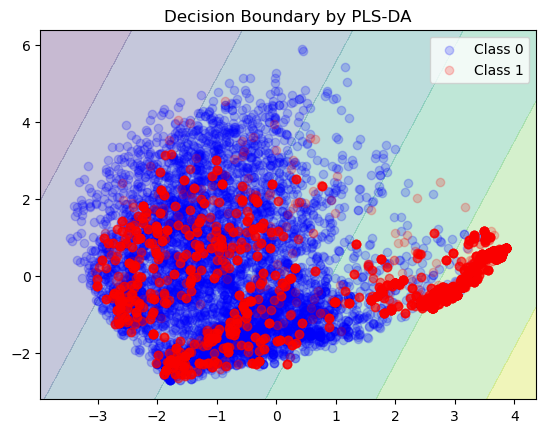

In [6]:
from sklearn.decomposition import PCA

# PCA를 사용하여 피처를 2개로 줄이기
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# PLS-DA 모델 학습
model_pca = plsda(n_components=1, max_iter=500, tol=0.000001)
model_pca.fit(X_pca, y_train)

# 결정 경계 시각화를 위한 그리드 생성 
x1s = np.linspace(X_pca[:, 0].min()-0.5, X_pca[:, 0].max()+0.5, 100)
# x1s: X_pca의 첫 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x2s = np.linspace(X_pca[:, 1].min()-0.5, X_pca[:, 1].max()+0.5, 100)
# x2s: X_pca의 두 번째 열의 최솟값에서 0.5를 뺀 값부터 최댓값에서 0.5를 더한 값까지 100개의 구간으로 나눈 배열
x1, x2 = np.meshgrid(x1s, x2s)
# x1, x2: x1s와 x2s를 격자로 나눈 배열
X_new = np.c_[x1.ravel(), x2.ravel()]
# X_new: x1과 x2를 1차원 배열로 변환한 후, 열로 합친 배열

# PLS-DA 모델을 사용하여 예측
y_pred = model_pca.predict(X_new).reshape(x1.shape)

# 결정 경계 및 데이터 포인트 시각화
plt.contourf(x1, x2, y_pred, alpha=0.3)
# x1, x2, y_pred를 사용하여 등고선을 그립니다.
plt.scatter(X_pca[:, 0][y_train==0], X_pca[:, 1][y_train==0], color='blue', alpha=0.2, label='Class 0')
# y가 0인 행을 파란색으로 점으로 표시합니다.
plt.scatter(X_pca[:, 0][y_train==1], X_pca[:, 1][y_train==1], color='red', alpha=0.2, label='Class 1')
# y가 1인 행을 빨간색으로 점으로 표시합니다.
plt.title("Decision Boundary by PLS-DA")
plt.legend()
plt.show()

# - 아래 그림은 두 Feature를 사용하여 Partial Least Squares Discriminant Analysis를 학습한 결과입니다. 2차원 축을 사용하여 결정 경계를 쉽게 
# - 표현할 수 있기에 Feature 개수를 2개로 줄인 후 이를 시각화하였습니다.

## X_PCA 데이터의 혼동행렬을 위한 ROC 곡선 시각화

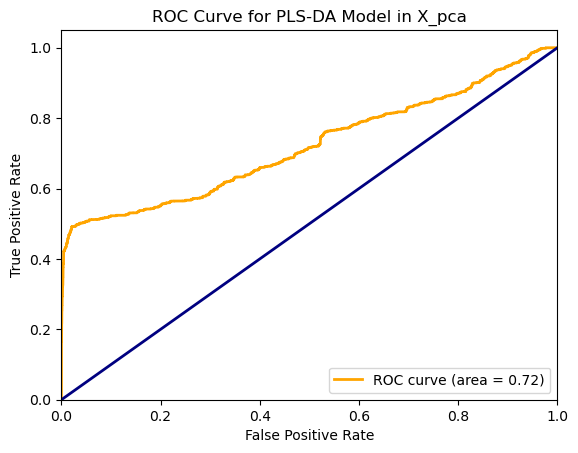

Optimal threshold: 0.6912080534595424
Confusion Matrix in X_pca Dataset
[[5446  119]
 [2832 2733]]


In [7]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# prediction 수행
y_pred_probs = model_pca.predict(X_pca)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_train, y_pred_probs)

# ROC 곡선 아래 영역 (AUC) 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for PLS-DA Model in X_pca')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 찾기
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

from sklearn.metrics import confusion_matrix
predict_y = model_pca.predict(X_pca)
predict_y = np.where(predict_y > optimal_threshold, 1, 0)
Matrix = confusion_matrix(y_train, predict_y)
print("Confusion Matrix in X_pca Dataset")
print(Matrix)

# plsda의 출력이 0 또는 1의 이진 값이 아닌 연속형 변수이므로, ROC 곡선의 넓이가 최대가 되도록 하는 임계값을 설정해, 해당 값보다 크다면 1, 작다면 0의 값을 할당하고 이를 바탕으로 혼동행렬을 작성했습니다.

## Test data의 혼동행렬을 위한 ROC 곡선 시각화

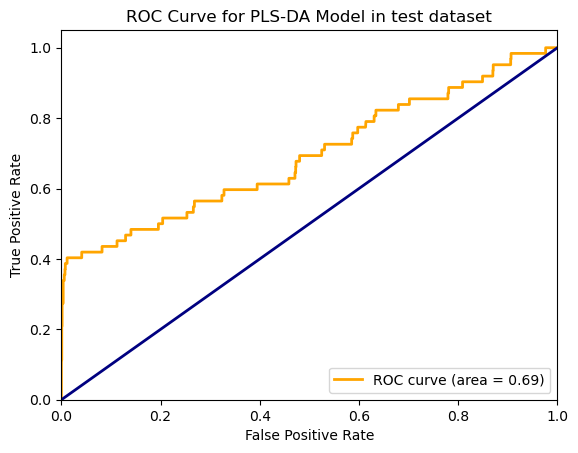

Optimal threshold: 0.7874192330150189


In [8]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Data_PATH_test = '../0.Data/tox21_test.csv'
df_test = pd.read_csv(Data_PATH_test)
# 전처리를 완료한 데이터셋을 불러옵니다.
# 이때, 상대 경로나 절대 경로를 지정하여 파일의 위치를 지정해주어야 합니다.

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:,-1]
# df_test는 X_test(독립변수), y_test(반응변수)로 분할합니다.

# prediction 수행
y_pred_probs = model.predict(X_test)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# ROC 곡선 아래 영역 (AUC) 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for PLS-DA Model in test dataset')
plt.legend(loc="lower right")
plt.show()

# 최적의 임계값 찾기
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

# plsda의 출력이 0 또는 1의 이진 값이 아닌 연속형 변수이므로, ROC 곡선의 넓이가 최대가 되도록 하는 임계값을 설정해, 해당 값보다 크다면 1, 작다면 0의 값을 할당하고 이를 바탕으로 혼동행렬을 작성했습니다.

## 혼동 행렬을 출력합니다.

In [9]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix

predict_y = model.predict(X_test)
predict_y = np.where(predict_y > optimal_threshold, 1, 0)
print("Confusion Matrix in Test Dataset")
print(confusion_matrix(y_test, predict_y))

# 혼동행렬은 2x2 행렬로, 실제 클래스와 예측 클래스가 일치하는지 여부에 따라 4개의 값을 가집니다.
# - 1375개의 샘플이 0으로 예측되고 실제로 0입니다. (True Negative)
# - 16개의 샘플이 1로 예측되고 실제로 0입니다. (False Positive)
# - 38개의 샘플이 0으로 예측되고 실제로 1입니다. (False Negative)
# - 24개의 샘플이 1로 예측되고 실제로 1입니다. (True Positive)

Confusion Matrix in Test Dataset


array([[1375,   16],
       [  38,   24]], dtype=int64)